<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #454a46; font-size:130%; text-align:left;
width:900px;">

<h2 align="left"><font color=white>Sumário:</font></h2>


* [1 | Compreensão dos dados educacionais](#compreensao)
    - [1.1 | Importação das bibliotecas](#libraries)
    - [1.2 | Leitura da base de dados](#loadingdata)
    - [1.3 | Limpeza inicial dos dados](#initialcleaning)
    - [1.4 | Análise exploratória dos dados](#initialdataanalysis)
        - [1.4.1 | Data overview](#overview)
        - [1.4.2 | Levantamento e análise das hipósteses](#summary)


<a id="compreensao"></a>
# <p style="background-color: #454a46; font-family:calibri; color:white;font-size:120%; font-family:Verdana; text-align:center; border-radius:25px 15px; width:100%">1 | Compreensão dos dados educacionais</p>
⬆️ [Sumário](#contents_tabel)

Nesta etapa será realizada a análise e compreensão dos dados gerados pelo censo escolar da educação básica.

Começaremos com uma limpeza inicial dos dados para remover eventuais erros e valores anormais. Após isso, será feita uma análise univariada, observando-se estatísticas sobre a distribuição das variáveis, valores mínimos e máximos, média, desvio padrão, etc.


Essa etapa se encaixa na seção "Exploração de dados" descrito no <a href="https://github.com/Geraldomendes/SchoolDropoutPrediction/issues/2">projeto do github</a>. Onde tem-se a seguinte descrição:


<div style="border:1px solid black;background-color:white;color:black">

Você deve criar um notebook de análise exploratória **notebooks/01-exploratory_data_analysis.ipynb**, contendo as seguintes seções de texto:

 - Descrição dos dados: informações sobre a quantidade de instâncias, variáveis e seus tipos, quantidade de valores faltantes. - - Utilize o dicionário de dados nessa seção.
 - Perguntas de partida e hipóteses: que tipo de informações podem ser obtidas a partir dos dados e quais hipóteses podem ser   levantadas?
 - Percepções: respostas às perguntas feitas na seção anterior e quais informações interessantes podem ser levantadas através dos dados?



<div style="border-radius:10px; padding: 15px; background-color: white; font-size:120%; text-align:left;
width:900px;color:black">

<h2 align="left"><font color=black>Exemplo de dicionário de dados:</font></h2>

| __Variável__   | __Descrição__ |
|     :---       |       :---      |      
| __Var1__  | Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. |
| __Var2__  | Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. |
| __Var3__| Lorem ipsum dolor sit amet, consectetur adipiscing elit. |


<a id="libraries"></a>
# <b><span style='color:white;font-size:90%'>1.1 |</span><span style='color:#6e7570;font-size:90%'>Importação das bibliotecas</span></b>
⬆️ [Sumário](#contents_tabel)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
#from plotly.offline import iplot, init_notebook_mode
#import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/home/matheusv/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<a id="loadingdata"></a>
# <b><span style='color:white;font-size:90%'>1.2 |</span><span style='color:#6e7570;font-size:90%'>Leitura da base de dados</span></b>
⬆️ [Sumário](#contents_tabel)

In [2]:
data = pd.read_csv('./2021 - Matrículas.csv',sep=';')
data.head()

,Carga Horaria,Carga Horaria Mínima,Categoria da Situação,Co Inst,Cod Unidade,Cor / Raça,Código da Matricula,Código da Unidade de Ensino - SISTEC,Código do Ciclo Matricula,Código do Município com DV,...,Vagas Ofertadas,Vagas Regulares AC,Vagas Regulares l1,Vagas Regulares l10,Vagas Regulares l13,Vagas Regulares l14,Vagas Regulares l2,Vagas Regulares l5,Vagas Regulares l6,Vagas Regulares l9
0,200,200.0,Evadidos,262432,557,Amarela,96176470,3479.0,2716099,2407104,...,850.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,160,160.0,Em curso,26436,6002,Amarela,102483972,45430.0,2830452,4314407,...,2834.0,2834.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,160,160.0,Em curso,26436,6002,Amarela,102459282,45430.0,2830437,4314407,...,1234.0,1234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40,160.0,Em curso,26419,116,Amarela,97887414,2936.0,2745532,4302105,...,265.0,265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1380,1200.0,Em curso,26404,436,Amarela,91646798,2947.0,2632269,2927903,...,40.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = data[data['Tipo de Curso']=='Ensino Médio']
data.shape

(5710, 56)

<a id="initialcleaning"></a>
# <b><span style='color:white;font-size:90%'>1.3 |</span><span style='color:#6e7570;font-size:90%'>Limpeza inicial dos dados</span></b>
⬆️ [Sumário](#contents_tabel)

In [5]:
data.columns

Index(['Carga Horaria', 'Carga Horaria Mínima', 'Categoria da Situação',
       'Co Inst', 'Cod Unidade', 'Cor / Raça', 'Código da Matricula',
       'Código da Unidade de Ensino - SISTEC', 'Código do Ciclo Matricula',
       'Código do Município com DV', 'Data de Fim Previsto do Ciclo',
       'Data de Inicio do Ciclo', 'Data de Ocorrencia da Matricula',
       'Eixo Tecnológico', 'Faixa Etária', 'Fator Esforço Curso',
       'Fonte de Financiamento', 'Idade', 'Instituição', 'Matrículas Atendida',
       'Matrículas Equivalentes', 'Modalidade de Ensino', 'Município',
       'Mês De Ocorrência da Situação', 'Nome de Curso', 'Número de registros',
       'Região', 'Renda Familiar', 'Sexo', 'Situação de Matrícula',
       'Subeixo Tecnológico', 'Tipo de Curso', 'Tipo de Oferta',
       'Total de Inscritos', 'Turno', 'UF', 'Unidade de Ensino',
       'Vagas Extraordinárias AC', 'Vagas Extraordinárias l1',
       'Vagas Extraordinárias l10', 'Vagas Extraordinárias l13',
       'Vagas Extra

In [6]:
data.drop(columns=['Vagas Extraordinárias AC', 'Vagas Extraordinárias l1',
       'Vagas Extraordinárias l10', 'Vagas Extraordinárias l13',
       'Vagas Extraordinárias l14', 'Vagas Extraordinárias l2',
       'Vagas Extraordinárias l5', 'Vagas Extraordinárias l6',
       'Vagas Extraordinárias l9', 'Vagas Ofertadas', 'Vagas Regulares AC',
       'Vagas Regulares l1', 'Vagas Regulares l10', 'Vagas Regulares l13',
       'Vagas Regulares l14', 'Vagas Regulares l2', 'Vagas Regulares l5',
       'Vagas Regulares l6', 'Vagas Regulares l9'],axis=1, inplace=True)

In [7]:
sns.set_style("whitegrid")

In [8]:
null_data = data.isnull().sum()
null_data = null_data[null_data>0]

In [9]:
null_percentage = (null_data/data.shape[0]) * 100

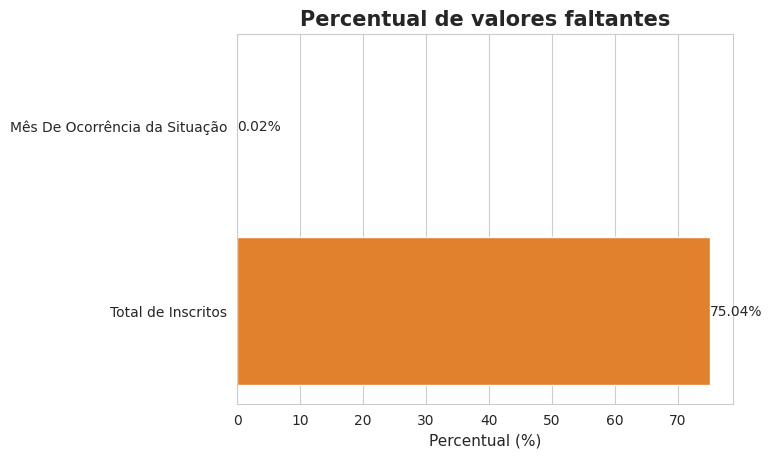

In [10]:
ax = sns.barplot(y=null_percentage.index,x=null_percentage, orient='h')
ax.bar_label(ax.containers[0],fmt=lambda x: str(x.round(2))+'%')
plt.title("Percentual de valores faltantes", fontweight='bold', fontsize=15)
plt.xlabel('Percentual (%)', fontsize=11)
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data.isna().sum()

Carga Horaria                           0
Carga Horaria Mínima                    0
Categoria da Situação                   0
Co Inst                                 0
Cod Unidade                             0
Cor / Raça                              0
Código da Matricula                     0
Código da Unidade de Ensino - SISTEC    0
Código do Ciclo Matricula               0
Código do Município com DV              0
Data de Fim Previsto do Ciclo           0
Data de Inicio do Ciclo                 0
Data de Ocorrencia da Matricula         0
Eixo Tecnológico                        0
Faixa Etária                            0
Fator Esforço Curso                     0
Fonte de Financiamento                  0
Idade                                   0
Instituição                             0
Matrículas Atendida                     0
Matrículas Equivalentes                 0
Modalidade de Ensino                    0
Município                               0
Mês De Ocorrência da Situação     

In [13]:
data[data.duplicated(keep=False)]

,Carga Horaria,Carga Horaria Mínima,Categoria da Situação,Co Inst,Cod Unidade,Cor / Raça,Código da Matricula,Código da Unidade de Ensino - SISTEC,Código do Ciclo Matricula,Código do Município com DV,...,Renda Familiar,Sexo,Situação de Matrícula,Subeixo Tecnológico,Tipo de Curso,Tipo de Oferta,Total de Inscritos,Turno,UF,Unidade de Ensino


In [14]:
data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 1424 entries, 25197 to 1041212
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Categoria da Situação            1424 non-null   object
 1   Cor / Raça                       1424 non-null   object
 2   Data de Fim Previsto do Ciclo    1424 non-null   object
 3   Data de Inicio do Ciclo          1424 non-null   object
 4   Data de Ocorrencia da Matricula  1424 non-null   object
 5   Eixo Tecnológico                 1424 non-null   object
 6   Faixa Etária                     1424 non-null   object
 7   Fator Esforço Curso              1424 non-null   object
 8   Fonte de Financiamento           1424 non-null   object
 9   Instituição                      1424 non-null   object
 10  Matrículas Atendida              1424 non-null   object
 11  Matrículas Equivalentes          1424 non-null   object
 12  Modalidade de Ensino            

In [15]:
data.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 1424 entries, 25197 to 1041212
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Carga Horaria                         1424 non-null   int64  
 1   Carga Horaria Mínima                  1424 non-null   float64
 2   Co Inst                               1424 non-null   int64  
 3   Cod Unidade                           1424 non-null   int64  
 4   Código da Matricula                   1424 non-null   int64  
 5   Código da Unidade de Ensino - SISTEC  1424 non-null   float64
 6   Código do Ciclo Matricula             1424 non-null   int64  
 7   Código do Município com DV            1424 non-null   int64  
 8   Idade                                 1424 non-null   float64
 9   Número de registros                   1424 non-null   int64  
 10  Total de Inscritos                    1424 non-null   float64
dtypes: float64(4), 

In [16]:
data['Idade'] = data['Idade'].astype(int)

data['Carga Horaria Mínima'] = data['Carga Horaria Mínima'].astype(int)
data['Código da Unidade de Ensino - SISTEC'] = data['Código da Unidade de Ensino - SISTEC'].astype(int)
data['Total de Inscritos'] = data['Total de Inscritos'].astype(int)

In [17]:
data['Fator Esforço Curso'] = data['Fator Esforço Curso'].str.replace(',','.').astype(float)

In [18]:
def check_cat_vars(var_columns):
    for var in var_columns:
       display( data[var].value_counts())

In [19]:
cat_cols = data.select_dtypes(include='object').columns.tolist()

In [20]:
check_cat_vars(cat_cols)

Categoria da Situação
Em curso    1358
Evadidos      66
Name: count, dtype: int64

Cor / Raça
Branca           698
Parda            436
Não declarada    163
Preta            126
Amarela            1
Name: count, dtype: int64

Data de Fim Previsto do Ciclo
15/12/2023    966
24/12/2023    108
29/12/2023    106
30/12/2023     83
20/12/2022     66
20/12/2023     44
23/12/2023     30
31/12/2023     21
Name: count, dtype: int64

Data de Inicio do Ciclo
06/08/2021    1032
15/03/2021     161
01/04/2021      60
24/05/2021      59
22/04/2021      47
16/04/2021      44
05/04/2021      21
Name: count, dtype: int64

Data de Ocorrencia da Matricula
01/08/2021    570
01/09/2021    410
01/04/2021    170
01/03/2021    102
01/05/2021    101
01/10/2021     49
01/06/2021     18
01/12/2021      2
01/07/2021      1
01/11/2021      1
Name: count, dtype: int64

Eixo Tecnológico
Propedêutico    1424
Name: count, dtype: int64

Faixa Etária
15 a 19 anos        1404
20 a 24 anos          12
Menor de 14 anos       6
Maior de 60 anos       1
30 a 34 anos           1
Name: count, dtype: int64

Fonte de Financiamento
Sem Programa Associado    1424
Name: count, dtype: int64

Instituição
CPII                  1032
UFPI - CAT              83
UFPI - CABJ             78
UFPI - CTF              60
UFRRJ - CTUR            59
UFRPE - CODAI           47
UFCG - ETSC             44
UFSM - POLITÉCNICO      21
Name: count, dtype: int64

Matrículas Atendida
Sim    1424
Name: count, dtype: int64

Matrículas Equivalentes
1,067    1424
Name: count, dtype: int64

Modalidade de Ensino
Educação Presencial    1424
Name: count, dtype: int64

Município
Rio de Janeiro          839
Niterói                 107
Duque de Caxias          86
Teresina                 83
Bom Jesus                78
Floriano                 60
Seropédica               59
São Lourenço da Mata     47
Cajazeiras               44
Santa Maria              21
Name: count, dtype: int64

Mês De Ocorrência da Situação
01/08/2021    565
01/09/2021    414
01/04/2021    164
01/03/2021     83
07/03/2022     66
01/05/2021     60
01/10/2021     48
23/12/2021     10
01/12/2021      5
01/11/2021      2
01/06/2021      1
01/07/2021      1
10/11/2021      1
12/11/2021      1
24/11/2021      1
19/11/2021      1
05/08/2021      1
Name: count, dtype: int64

Nome de Curso
Ensino Médio    1424
Name: count, dtype: int64

Região
Região Sudeste     1091
Região Nordeste     312
Região Sul           21
Name: count, dtype: int64

Renda Familiar
Não declarada    505
1,0<RFP<=1,5     272
2,5<RFP<=3,5     153
RFP>3,5          151
1,5<RFP<=2,5     150
0,5<RFP<=1,0     129
0<RFP<=0,5        64
Name: count, dtype: int64

Sexo
Feminino     900
Masculino    524
Name: count, dtype: int64

Situação de Matrícula
Em curso           1358
Reprovado            28
Desligada            16
Abandono             14
Transf. externa       5
Cancelada             3
Name: count, dtype: int64

Subeixo Tecnológico
Propedêutico    1424
Name: count, dtype: int64

Tipo de Curso
Ensino Médio    1424
Name: count, dtype: int64

Tipo de Oferta
Não se aplica    1424
Name: count, dtype: int64

Turno
Matutino      881
Vespertino    517
Noturno        26
Name: count, dtype: int64

UF
RJ    1091
PI     221
PE      47
PB      44
RS      21
Name: count, dtype: int64

Unidade de Ensino
Campus São Cristóvão III                                   209
Campus Realengo II                                         183
Campus Humaitá II                                          147
Campus Tijuca II                                           112
Campus Niterói                                             107
Campus Engenho Novo II                                      99
Campus Centro                                               89
Campus Duque de Caxias                                      86
Colégio Técnico de Teresina da UFPI                         83
Colégio Técnico de Bom Jesus da UFPI                        78
Colégio Técnico de Floriano da UFPI                         60
Colégio Técnico da UFRRJ                                    59
Colégio Agrícola Dom Agostinho Ikas da UFRPE                47
Escola Técnica de Saúde de Cajazeiras da UFCG               44
Colégio Politécnico da Universidade Federal Santa Maria     21
Name: count, dtype: int64

In [23]:
for col in ['Data de Inicio do Ciclo','Data de Ocorrencia da Matricula','Data de Fim Previsto do Ciclo']:
    data[col] = pd.to_datetime(data[col],format="%d/%m/%Y")

In [24]:
data[['Data de Inicio do Ciclo','Data de Ocorrencia da Matricula','Data de Fim Previsto do Ciclo']].head()

,Data de Inicio do Ciclo,Data de Ocorrencia da Matricula,Data de Fim Previsto do Ciclo
25197,2021-03-15,2021-05-01,2023-12-24
25198,2021-03-15,2021-05-01,2023-12-24
25199,2021-03-15,2021-05-01,2023-12-24
25223,2021-03-15,2021-05-01,2023-12-24
25712,2021-04-22,2021-04-01,2023-12-29


In [141]:
#pd.to_datetime(data['Data de Inicio do Ciclo'],format="%d/%m/%Y").dt.strftime("%d-%m-%Y")

In [135]:
# n = 0
# while n<21530:
#     try:
#         pd.to_datetime(data['Data de Inicio do Ciclo'],format="%d/%m/%Y")
#         break
#     except ValueError as e1:
#         print(e1)
#     n = n+1

In [25]:
num_var = data.select_dtypes(include=['int64','float64']).columns.tolist()

In [26]:
def check_num_var(num_var):
    df = pd.DataFrame({})
    for col in num_var:
        describe = pd.DataFrame(data[col].describe()).T
        df = pd.concat([df,describe])
    return df

In [27]:
result = check_num_var(num_var)
result.round()

,count,mean,std,min,25%,50%,75%,max
Carga Horaria,1424.0,3042.0,275.0,2490.0,3051.0,3051.0,3051.0,4200.0
Carga Horaria Mínima,1424.0,2400.0,0.0,2400.0,2400.0,2400.0,2400.0,2400.0
Co Inst,1424.0,66409.0,88878.0,26201.0,26201.0,26201.0,26248.0,262793.0
Cod Unidade,1424.0,402.0,135.0,171.0,248.0,457.0,547.0,564.0
Código da Matricula,1424.0,100585922.0,898721.0,98560205.0,99664634.0,100972815.0,101100084.0,102551994.0
Código da Unidade de Ensino - SISTEC,1424.0,11335.0,13256.0,534.0,1702.0,1705.0,12980.0,43414.0
Código do Ciclo Matricula,1424.0,2791469.0,16038.0,2758636.0,2776323.0,2799798.0,2801554.0,2805044.0
Código do Município com DV,1424.0,3101200.0,443636.0,2201903.0,3301702.0,3304557.0,3304557.0,4316907.0
Fator Esforço Curso,1424.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Idade,1424.0,16.0,2.0,13.0,15.0,16.0,16.0,60.0


<a id="initialdataanalysis"></a>
# <b><span style='color:white;font-size:90%'>1.4 |</span><span style='color:#6e7570;font-size:90%'>Análise exploratória dos dados</span></b>
⬆️ [Sumário](#contents_tabel)

<a id="initialdataanalysis"></a>
# <b><span style='color:white;font-size:80%'>1.4.1 |</span><span style='color:#6e7570;font-size:80%'>Data Overview</span></b>
⬆️ [Sumário](#contents_tabel)


- Ver a distribuição das variáveis categóricas (boxplot e/ou gráfico de barras)
- Ver a distribuição das variáveis numéricas (histograma, displot, kdeplot)

<a id="summary"></a>
# <b><span style='color:white;font-size:80%'>1.4.2 |</span><span style='color:#6e7570;font-size:80%'>Levantamento e análise das hipóteses</span></b>
⬆️ [Sumário](#contents_tabel)

### Perguntas de partida de hipóteses: Aqui é algo relacionado ao fenômeno que se está tentando modelar, como previsão de vendas, reconhecimento facial, clusterização, previsão da evasão estudantil, etc.

Então devem ser levantadas hipóteses sobre o problema em questão. Para este problema, podemos ter algumas hipóteses como:

- Alunos acima de 30 anos deveriam evadir mais
- Alunos com renda <=1,5 salários mínimo deveriam evadir mais
- Alunos de cor/raça negra deveriam evadir mais
- Alunos do sexo masculino deveriam evadir mais

- Cursos do turno matutino deveriam ter mais evasões
- Cursos com uma carga horária maior deveriam ter mais evasões
- Cursos com um fator de esforço maior deveriam ter mais evasões

- Instituições da região Nordeste deveriam ter mais evasões
- Instituições do Rio de Janeiro e São Paulo deveriam ter mais evasões
- Instituições com menor quantidade de alunos deveriam ter menor taxa de evasão

- No inicio do ciclo (3 primeiros meses) deveria ter uma taxa maior de evasões
- No segundo semestre do ano deveria haver menos evasões